In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Exploration

In [76]:
file_path = ["Data Set/ARUNACHAL_PRADESH.csv","Data Set/ASSAM.csv","Data Set/BIHAR.csv","Data Set/DELHI.csv","Data Set/GOA.csv","Data Set/GUJARAT.csv",
             "Data Set/HIMACHAL_PRADESH.csv","Data Set/JHARKHAND.csv","Data Set/KARNATAKA.csv","Data Set/KERALA.csv","Data Set/MAHARASHTRA.csv",
             "Data Set/MANIPUR.csv","Data Set/MIZORAM.csv","Data Set/NAGALAND.csv","Data Set/ODISHA.csv","Data Set/PUDUCHERRY.csv","Data Set/RAJASTHAN.csv",
             "Data Set/SIKKIM.csv","Data Set/TAMIL_NADU.csv","Data Set/TRIPURA.csv","Data Set/UTTAR_PRADESH.csv","Data Set/UTTARAKHAND.csv","Data Set/WEST_BENGAL.csv"
             ]

In [77]:
dataframes = [pd.read_csv(file, encoding='latin1') for file in file_path]
df = pd.concat(dataframes, ignore_index=True)
df.head(2)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`12,`000,STATE - ARUNACHAL PRADESH,`00,`000,`0000,Total,211353,160166,51187,...,22132,38415,19776,18639,24581,12610,11971,13834,7166,6668
1,`12,`000,STATE - ARUNACHAL PRADESH,`01,`000,`0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223


In [78]:
df.columns = df.columns.str.strip().str.lower().str.replace(" - ","_").str.replace(" ", "_").str.replace("__","_")

In [79]:
df.shape

(195145, 25)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   state_code                      195145 non-null  object
 1   district_code                   195145 non-null  object
 2   india/states                    195145 non-null  object
 3   division                        195145 non-null  object
 4   group                           195145 non-null  object
 5   class                           195145 non-null  object
 6   nic_name                        195145 non-null  object
 7   main_workers_total_persons      195145 non-null  int64 
 8   main_workers_total_males        195145 non-null  int64 
 9   main_workers_total_females      195145 non-null  int64 
 10  main_workers_rural_persons      195145 non-null  int64 
 11  main_workers_rural_males        195145 non-null  int64 
 12  main_workers_rural_females    

In [81]:
df.isnull().sum()

state_code                        0
district_code                     0
india/states                      0
division                          0
group                             0
class                             0
nic_name                          0
main_workers_total_persons        0
main_workers_total_males          0
main_workers_total_females        0
main_workers_rural_persons        0
main_workers_rural_males          0
main_workers_rural_females        0
main_workers_urban_persons        0
main_workers_urban_males          0
main_workers_urban_females        0
marginal_workers_total_persons    0
marginal_workers_total_males      0
marginal_workers_total_females    0
marginal_workers_rural_persons    0
marginal_workers_rural_males      0
marginal_workers_rural_females    0
marginal_workers_urban_persons    0
marginal_workers_urban_males      0
marginal_workers_urban_females    0
dtype: int64

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
main_workers_total_persons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
main_workers_total_males,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
main_workers_total_females,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
main_workers_rural_persons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
main_workers_rural_males,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0
main_workers_rural_females,195145.0,143.583407,4314.446369,0.0,0.0,0.0,8.0,1323903.0
main_workers_urban_persons,195145.0,831.518799,25867.811792,0.0,2.0,12.0,86.0,8849315.0
main_workers_urban_males,195145.0,676.135837,21673.393792,0.0,1.0,9.0,67.0,7354862.0
main_workers_urban_females,195145.0,155.382961,4531.592781,0.0,0.0,0.0,12.0,1494453.0
marginal_workers_total_persons,195145.0,364.267186,11769.400296,0.0,0.0,4.0,28.0,3834122.0


### Data Cleaning

In [83]:
# Remove backticks from specific columns

df['state_code'] = df['state_code'].str.replace('`', '')
df['district_code'] = df['district_code'].str.replace('`', '')
df['division'] = df['division'].str.replace('`', '')
df['group'] = df['group'].str.replace('`', '')
df['class'] = df['class'].str.replace('`', '')

In [84]:
# Drop rows

df = df[df['nic_name'] != "Blank"]
df = df[df['nic_name'] != "Total"]
df = df[df['nic_name'] != "Incomplete description/ Wrongly Classifed"]

In [85]:
df.head(2)

,state_code,district_code,india/states,division,group,class,nic_name,main_workers_total_persons,main_workers_total_males,main_workers_total_females,...,main_workers_urban_females,marginal_workers_total_persons,marginal_workers_total_males,marginal_workers_total_females,marginal_workers_rural_persons,marginal_workers_rural_males,marginal_workers_rural_females,marginal_workers_urban_persons,marginal_workers_urban_males,marginal_workers_urban_females
1,12,000,STATE - ARUNACHAL PRADESH,01,000,0000,"Crop and animal production, hunting and relate...",12967,8180,4787,...,736,2975,1211,1764,2545,1004,1541,430,207,223
2,12,000,STATE - ARUNACHAL PRADESH,01,011,0000,Growing of non-perennial crops,2373,1352,1021,...,363,1164,563,601,906,441,465,258,122,136


In [86]:
df.to_csv('EDA_df.csv', index=False)

### Feature Engineering

In [87]:
EDA_df = pd.read_csv("EDA_df.csv")

In [88]:
EDA_df["total_workers"] = EDA_df['main_workers_total_persons'] + EDA_df['marginal_workers_total_persons']

### Visualization

nic_name
Construction of buildings                                 19687668
Retail trade, except of motor vehicles and motorcycles     9086472
Land transport and transport via pipelines                 4959650
Other land transport                                       4398208
Education                                                  4376442
Name: main_workers_total_persons, dtype: int64


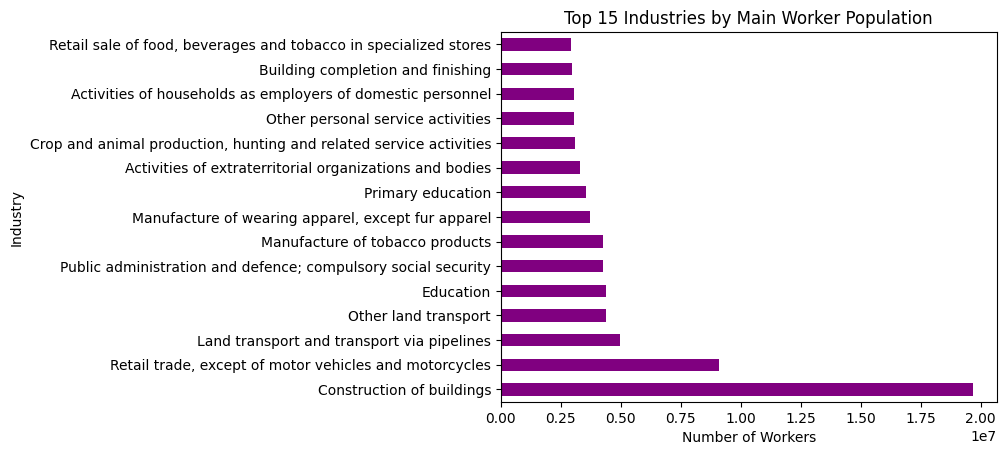

nic_name
Construction of buildings                                             5497356
Activities of extraterritorial organizations and bodies               3662942
Manufacture of tobacco products                                       2323398
Crop and animal production, hunting and related service activities    1634572
Construction of other civil engineering projects                      1485244
Name: marginal_workers_total_persons, dtype: int64


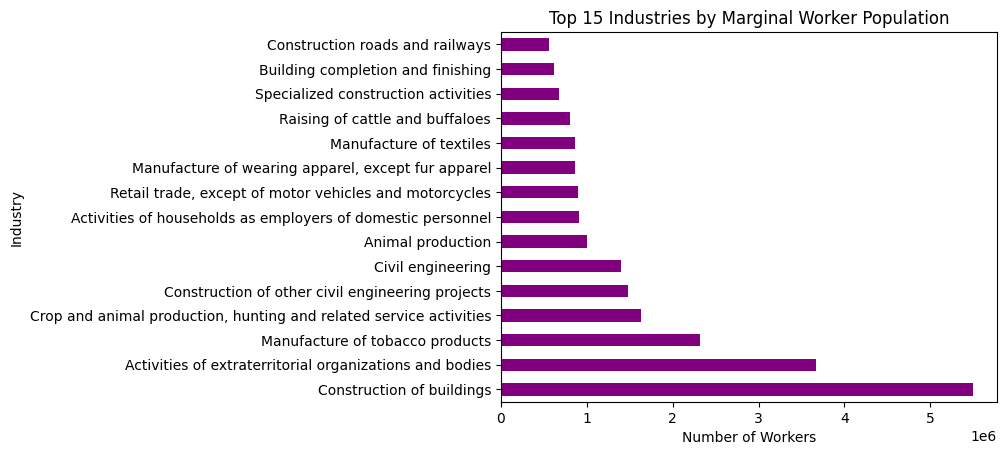

In [89]:
# Main Workers grouped by industry sector (nic_name)
main_sector_workers = EDA_df.groupby('nic_name')['main_workers_total_persons'].sum().sort_values(ascending=False).head(15)
print(main_sector_workers.head(5))

# Bar chart of top 15 industries
main_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Main Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()


# Marginal Workers grouped by industry sector (nic_name)
marginal_sector_workers = EDA_df.groupby('nic_name')['marginal_workers_total_persons'].sum().sort_values(ascending=False).head(15)
print(marginal_sector_workers.head(5))

# Bar chart of top 15 industries
marginal_sector_workers.plot(kind='barh', color='purple')
plt.title("Top 15 Industries by Marginal Worker Population")
plt.xlabel("Number of Workers")
plt.ylabel("Industry")
plt.show()

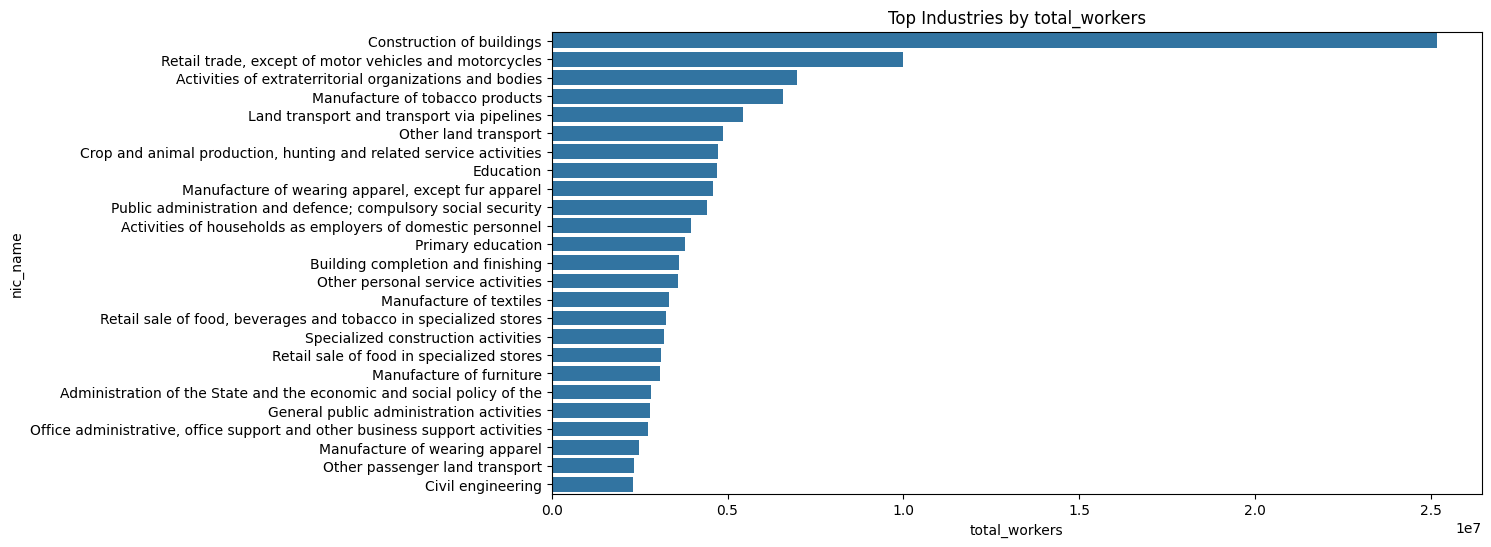

In [90]:
industry_data = EDA_df.groupby('nic_name')['total_workers'].sum().reset_index()
industry_data.sort_values('total_workers', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_workers', y='nic_name', data=industry_data.head(25))
plt.title("Top Industries by total_workers")
plt.show()

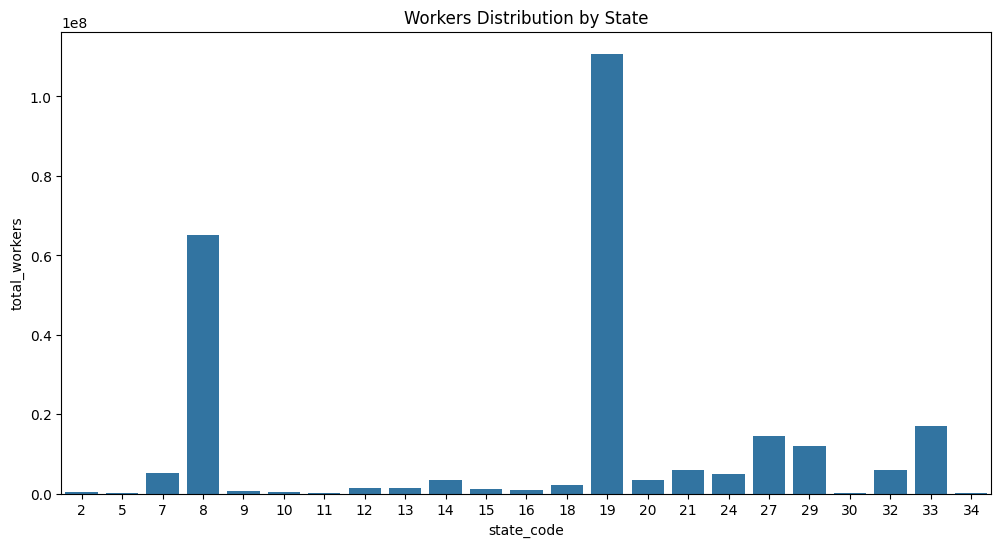

In [91]:
geo_data = EDA_df.groupby('state_code')['total_workers'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='state_code', y='total_workers', data=geo_data)
plt.title("Workers Distribution by State")
plt.show()

main_workers_rural_persons         93458426
main_workers_urban_persons        118354188
marginal_workers_rural_persons     32142032
marginal_workers_urban_persons     13859010
dtype: int64


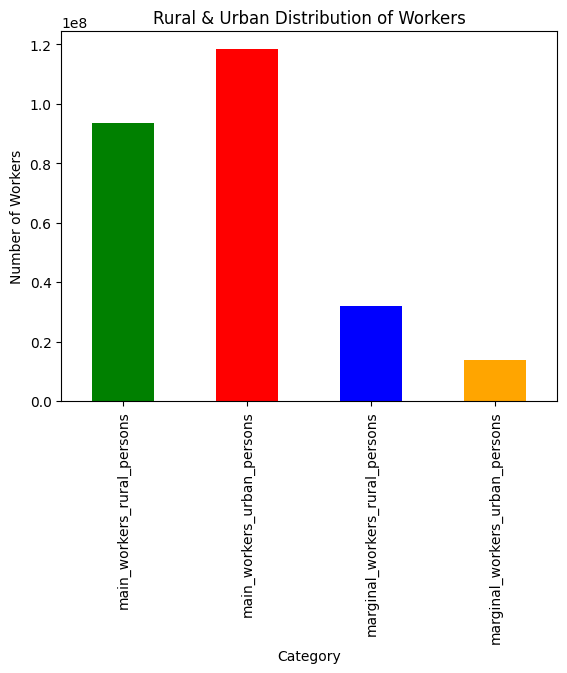

In [92]:
# Workers Rural & Urban distribution
rural_urban_distribution = EDA_df[['main_workers_rural_persons', 'main_workers_urban_persons',
                  'marginal_workers_rural_persons', 'marginal_workers_urban_persons']].sum()
print(rural_urban_distribution)

# Bar chart for rural & urban distribution
rural_urban_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Rural & Urban Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

main_workers_total_males          170936942
main_workers_total_females         40875672
marginal_workers_total_males       24232216
marginal_workers_total_females     21768826
dtype: int64


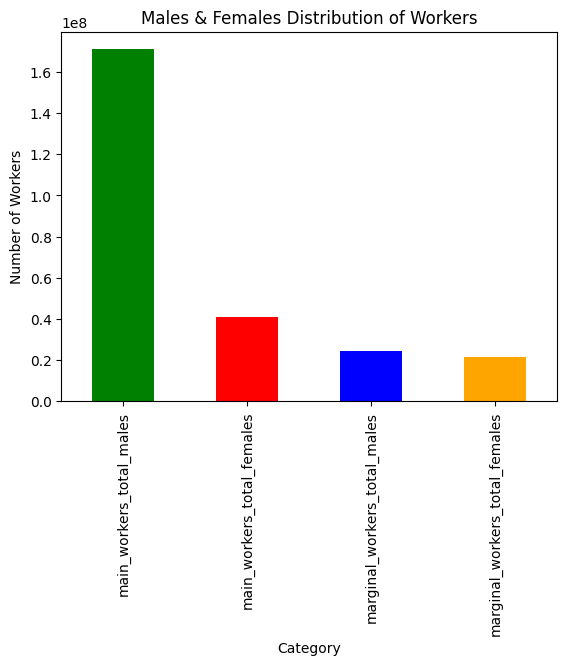

In [93]:
# Males & Females distribution
males_females_distribution = EDA_df[['main_workers_total_males', 'main_workers_total_females',
                    'marginal_workers_total_males', 'marginal_workers_total_females']].sum()
print(males_females_distribution)

# Bar chart for Males & Females distribution
males_females_distribution.plot(kind='bar', color=['green', 'red', "blue", "orange"])
plt.title("Males & Females Distribution of Workers")
plt.xlabel("Category")
plt.ylabel("Number of Workers")
plt.show()

### NLP

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',  max_df=0.85, min_df=2, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(EDA_df['nic_name'])
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1279486 stored elements and shape (192767, 1873)>

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
EDA_df['industry_group'] = kmeans.fit_predict(tfidf_matrix)

In [96]:
# Get the feature names (terms)
terms = vectorizer.get_feature_names_out()

# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

top_n = 5

# For each cluster, find the top N terms
for i, centroid in enumerate(centroids):
    top_indices = centroid.argsort()[-top_n:][::-1]
    top_terms = [terms[index] for index in top_indices]
    
    print(f"Cluster {i}:")
    print(top_terms)
    print("\n")

Cluster 0:
['education', 'transport', 'construction', 'manufacturing', 'mining']


Cluster 1:
['motor', 'motor vehicles', 'vehicles', 'motorcycles', 'maintenance repair']


Cluster 2:
['activities', 'service', 'service activities', 'telecommunications', 'telecommunications activities']


Cluster 3:
['manufacture', 'products', 'equipment', 'apparel', 'furniture']


Cluster 4:
['retail', 'retail sale', 'sale', 'stores', 'specialized stores']


Cluster 5:
['support', 'support activities', 'activities', 'support services', 'services']


Cluster 6:
['wholesale', 'specialized wholesale', 'contract basis', 'contract', 'basis']




In [97]:
industry_mapping = {
    0: 'Non-agricultural activities',
    1: 'Motor Vehicle Industry',
    2: 'Govrnment service sector',
    3: 'Small Industries',
    4: 'Retail stores',
    5: 'Service Organizations',
    6: 'Wholesale stores'
}
EDA_df['industry_group'] = EDA_df['industry_group'].map(industry_mapping)

In [98]:
EDA_df.to_csv('NLP_df.csv', index=False)

### ML Model(RandomForestClassifier)

In [99]:
nlp_df = pd.read_csv('NLP_df.csv')

In [100]:
# Regression model
features = ['state_code', 'district_code', 'division', 'group', 'class', 'industry_group']
ml_data = nlp_df[features]

In [101]:
# label Encoding Target values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ml_data['industry_group'] = label_encoder.fit_transform(ml_data['industry_group'])

C:\Users\Theju\AppData\Local\Temp\ipykernel_7568\3822084390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_data['industry_group'] = label_encoder.fit_transform(ml_data['industry_group'])


In [102]:
X = ml_data.drop(columns=['industry_group'])
y = ml_data['industry_group']

In [103]:
X

,state_code,district_code,division,group,class
0,12,0,1,0,0
1,12,0,1,11,0
2,12,0,1,11,111
3,12,0,1,11,112
4,12,0,1,11,113
...,...,...,...,...,...
192762,19,345,98,982,0
192763,19,345,98,982,9820
192764,19,345,99,0,0
192765,19,345,99,990,0


In [104]:
y

0         0
1         2
2         2
3         2
4         2
         ..
192762    0
192763    0
192764    0
192765    0
192766    0
Name: industry_group, Length: 192767, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [106]:
from sklearn.ensemble import RandomForestClassifier

r_f_c_model = RandomForestClassifier(random_state=28)
r_f_c_model.fit(X_train, y_train)
y_pred = r_f_c_model.predict(X_test)


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

Accuracy: 0.9998184364787052
Precision: 0.9998980078586337
Recall: 0.9999234889058913
F1-Score: 0.9999107276966835


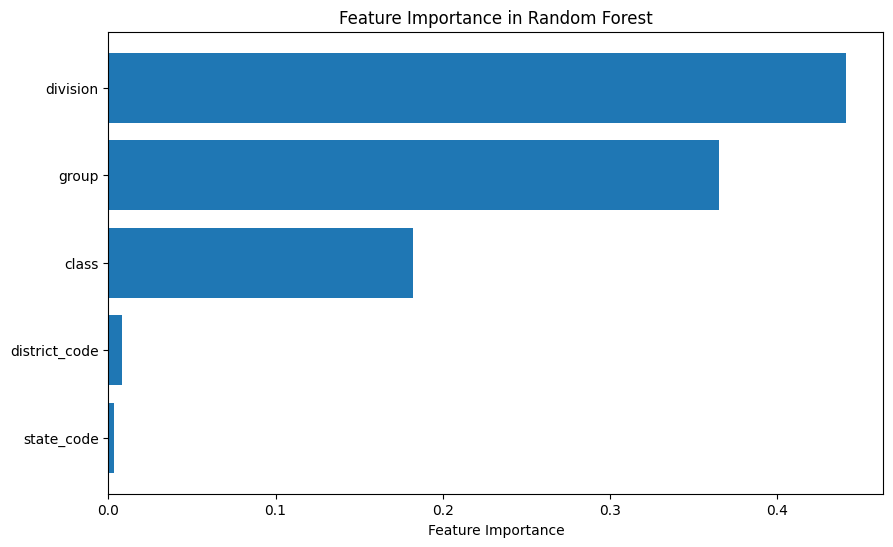

In [108]:
# Feature Importance

importances = r_f_c_model.feature_importances_
feature_names = X.columns

sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [109]:
import joblib

joblib.dump(r_f_c_model, 'Industrial_Human_Resouces.pkl')

['Industrial_Human_Resouces.pkl']

In [110]:
Industrial_Human_Resouces_model = joblib.load('Industrial_Human_Resouces.pkl')